HR Attirition Rate

In [7]:
import pandas as pd

# Load the dataset
df = pd.read_csv(r'C:\Datasets - ML\HR Employee Attrition.csv')

In [8]:
# Inspect the first few rows of the data
print(df.head())

# Check the structure of the data
print(df.info())

# Summary statistics for numerical columns
print(df.describe())


   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...

In [9]:
# Check for missing values
df.isnull().sum()

# If missing data exists, handle it (e.g., fill with mean/median, drop rows, etc.)
# Example: Fill missing numeric columns with median
df['Age'].fillna(df['Age'].median(), inplace=True)
df.dropna(subset=['Attrition'], inplace=True)  # Drop rows where 'Attrition' is missing


In [10]:
# Check for duplicates
df.duplicated().sum()

# Remove duplicates if any
df = df.drop_duplicates()


In [11]:
# Convert categorical columns to category dtype for better memory usage
df['Attrition'] = df['Attrition'].astype('category')
df['BusinessTravel'] = df['BusinessTravel'].astype('category')

# Example: Create new feature 'AgeGroup'
df['AgeGroup'] = pd.cut(df['Age'], bins=[20, 30, 40, 50, 60, 100], labels=['20-30', '30-40', '40-50', '50-60', '60+'])


C:\Users\orrpr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


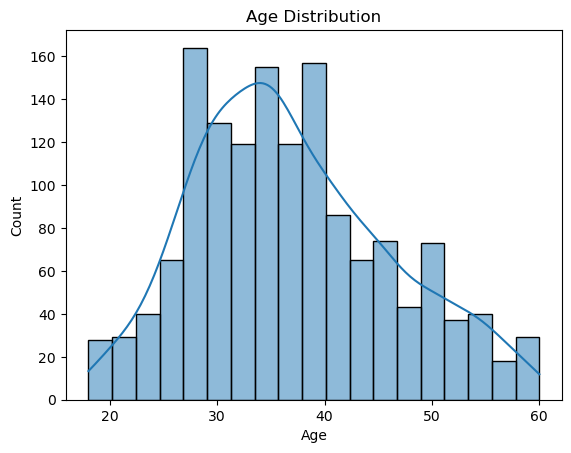

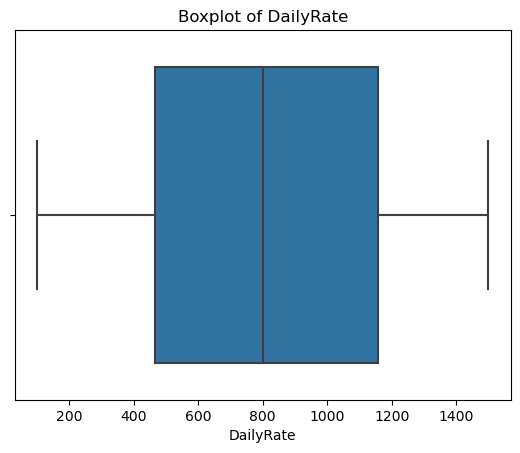

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for Age distribution
sns.histplot(df['Age'], kde=True)
plt.title('Age Distribution')
plt.show()

# Boxplot for DailyRate to check for outliers
sns.boxplot(x=df['DailyRate'])
plt.title('Boxplot of DailyRate')
plt.show()


C:\Users\orrpr\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


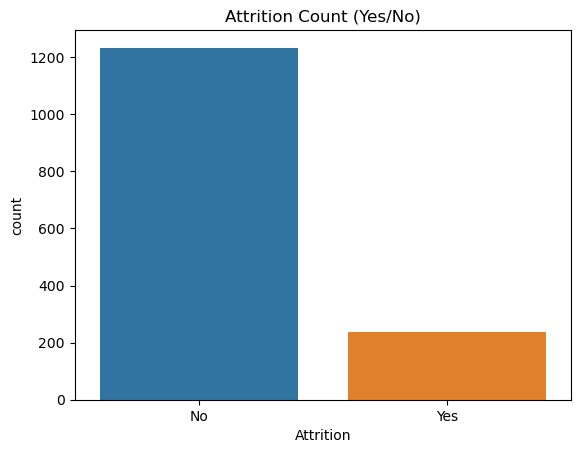

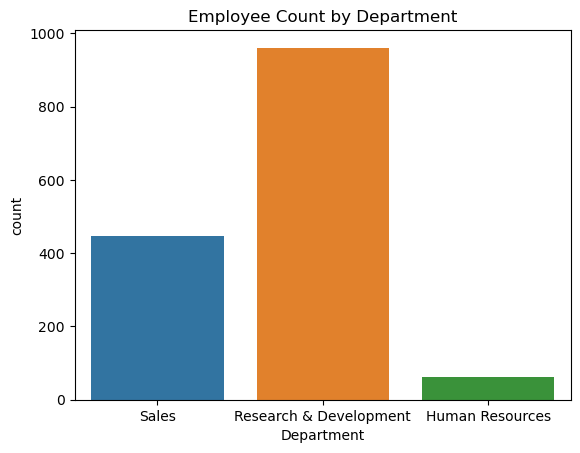

In [13]:
# Bar plot for Attrition (Yes/No)
sns.countplot(x='Attrition', data=df)
plt.title('Attrition Count (Yes/No)')
plt.show()

# Bar plot for Department
sns.countplot(x='Department', data=df)
plt.title('Employee Count by Department')
plt.show()


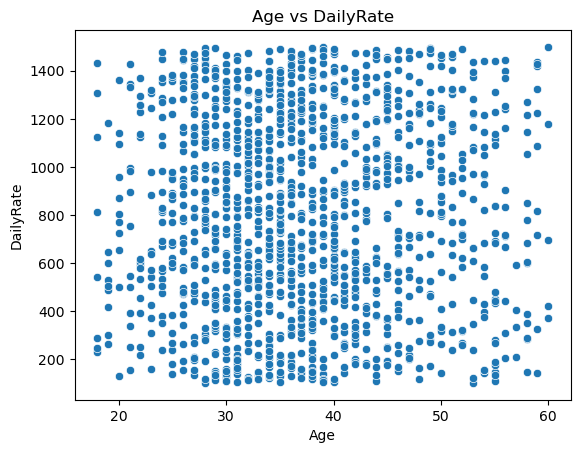

In [14]:
# Scatter plot for Age vs. DailyRate
sns.scatterplot(x='Age', y='DailyRate', data=df)
plt.title('Age vs DailyRate')
plt.show()


C:\Users\orrpr\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


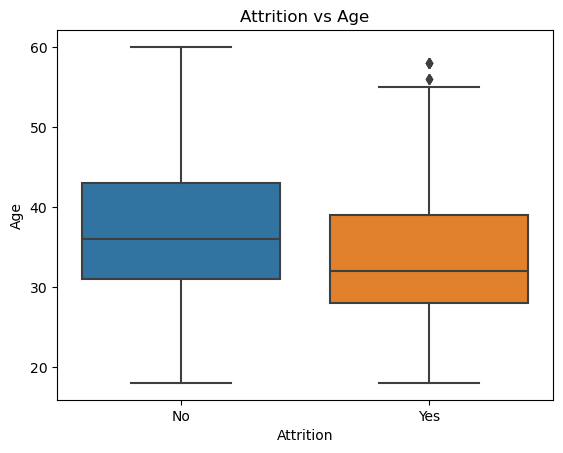

In [15]:
# Boxplot for Attrition vs. Age
sns.boxplot(x='Attrition', y='Age', data=df)
plt.title('Attrition vs Age')
plt.show()


C:\Users\orrpr\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


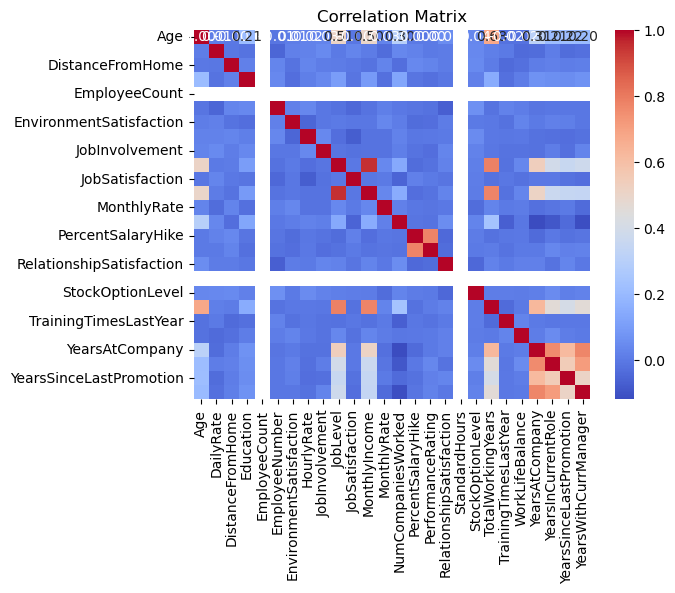

In [21]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
corr_matrix = numeric_df.corr()

# Create the heatmap
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


C:\Users\orrpr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\orrpr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\orrpr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\orrpr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

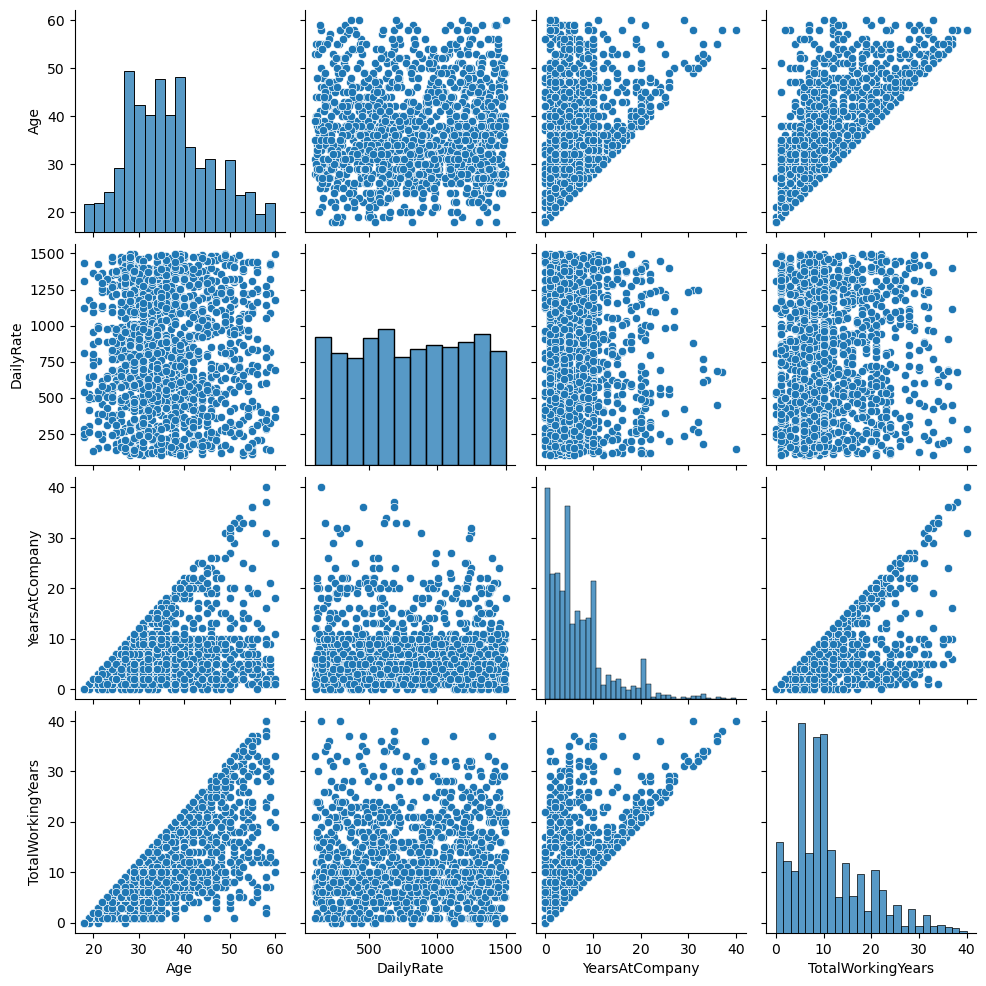

In [17]:
sns.pairplot(df[['Age', 'DailyRate', 'YearsAtCompany', 'TotalWorkingYears']])
plt.show()


In [22]:
# Identify outliers using IQR
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df_filtered = df[(df['Age'] >= lower_bound) & (df['Age'] <= upper_bound)]


In [23]:
from scipy import stats

# Test for normality (Shapiro-Wilk Test for Age)
stat, p_value = stats.shapiro(df['Age'])
print(f"Shapiro-Wilk Test: Stat={stat}, P-value={p_value}")


Shapiro-Wilk Test: Stat=0.9774477481842041, P-value=2.0344830149992416e-14


In [24]:
# Example: Create a feature 'YearsInCompanyGroup' based on years at the company
df['YearsInCompanyGroup'] = pd.cut(df['YearsAtCompany'], bins=[0, 5, 10, 20], labels=['0-5', '5-10', '10+'])


Here are the conclusions and insights from the HR Employee Attrition dataset in bullet points:

- The dataset includes a mix of numerical (e.g., Age, DailyRate) and categorical (e.g., Attrition, Department) features related to employee demographics, job satisfaction, performance, and tenure.  
- Attrition analysis shows a noticeable split between employees who stayed and those who left, enabling patterns to be observed.  
- Higher attrition rates are linked to employees with:  
  - Lower job satisfaction levels.  
  - Fewer total working years or shorter tenures at the company.  
  - Greater distances from home to the workplace.  
- Employees in specific departments or those with frequent business travel tend to have varying attrition rates, suggesting the need for department-specific retention strategies.  
- Correlation analysis highlights relationships between numerical features, such as:  
  - Positive correlation between total working years and years at the company.  
  - Potential links between salary and job satisfaction.  
- Identifying these key factors provides actionable insights for improving retention, such as focusing on employee satisfaction, reducing commuting burdens, or reevaluating departmental policies.  